In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read data

In [48]:
data_train = pd.read_csv('customer_churn_dataset-training-master.csv')
data_test = pd.read_csv('customer_churn_dataset-testing-master.csv')

In [49]:
data_train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [50]:
data_test.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [51]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [52]:
data_train.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [53]:
data_train = data_train.dropna()
data_train.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [54]:
data_train.nunique()

CustomerID           440832
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68363
Last Interaction         30
Churn                     2
dtype: int64

### EDA

In [55]:
def isMale(gender: str) -> int:
    return 1 if gender == 'Male' else 0

In [56]:
data_train = data_train.drop(columns='CustomerID')
data_train['Gender'] = data_train['Gender'].apply(isMale)
data_train.head(5)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


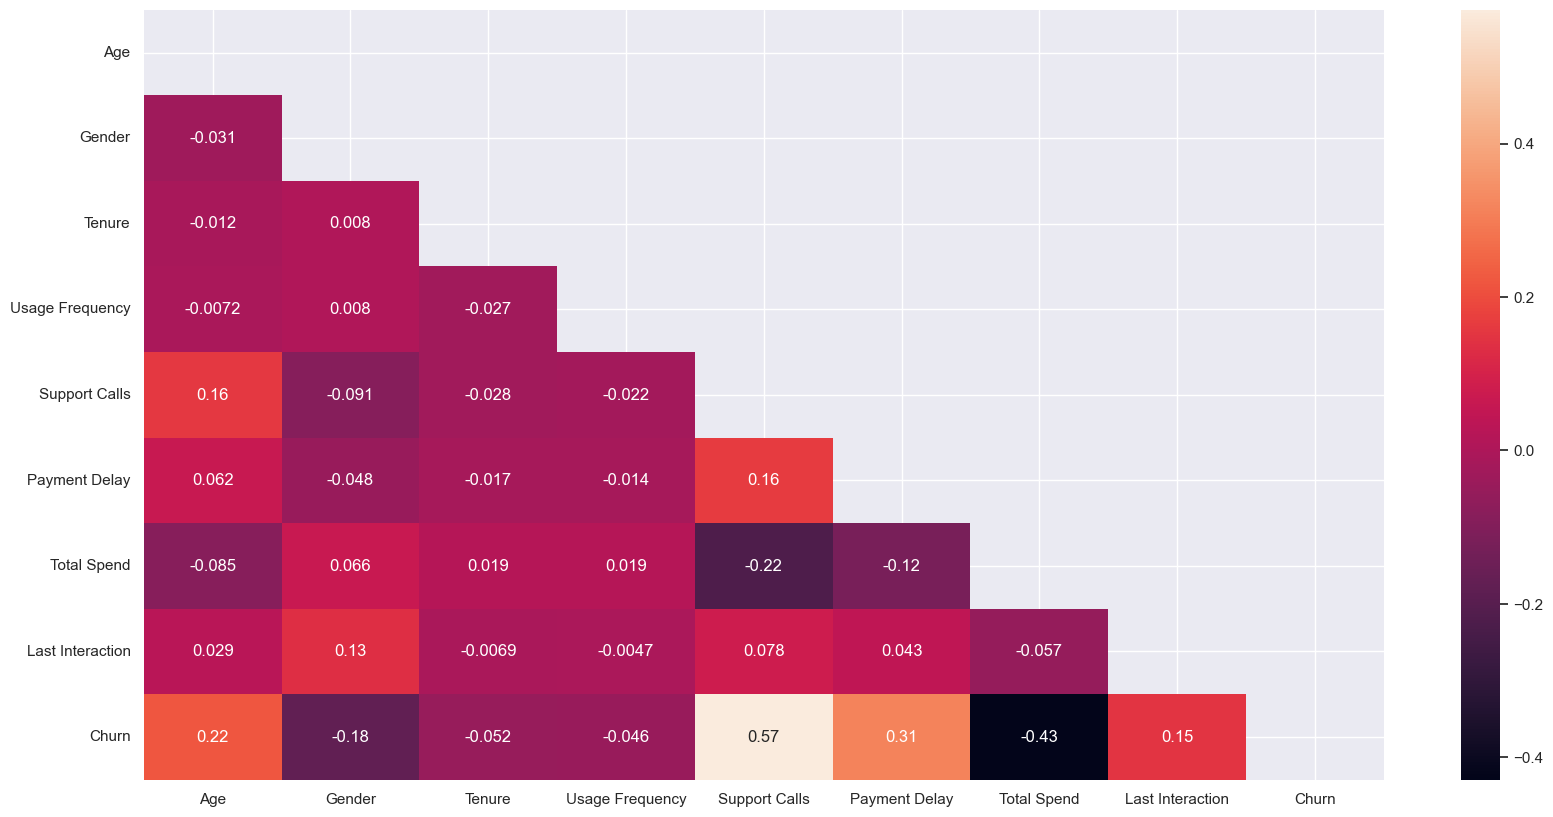

In [57]:
# Pearson heatmap

mask = np.zeros_like(data_train.corr(numeric_only=True))
mask[np.triu_indices_from(mask)] = True
sns.set(rc={'figure.figsize': (20, 10)})
sns.heatmap(data_train.corr(numeric_only=True, method='pearson'), annot=True, mask=mask);

Classification Task on the Churn Dataset
You need to build and train models to solve the classification task on the Churn dataset.
You should implement the following:

Use at least two methods to solve the classification task, such as:

Tree-based models (e.g., Random Forest, Gradient Boosting)
Multi-Layer Perceptron (MLP)
K-Nearest Neighbors (KNN)
Other classification algorithms (e.g., Logistic Regression, SVM)
Enhance the results of the benchmark models on the test set by:

Optimizing model performance through feature engineering.
Applying techniques like cross-validation to ensure robustness.
Comparing results with baseline models.
Provide deeper analysis for the data and the features. This can include:

Using iterative feature selection methods (e.g., Recursive Feature Elimination).
Selecting features using a correlation threshold to remove highly correlated features.
Exploring new relationships between the target variable and input features through visualization or statistical analysis.
Hyperparameter tuning:

For methods with hyperparameters (e.g., k in KNN, n_estimators in Random Forest), use grid search, random search, or Bayesian optimization to select the best parameters.
